In [154]:
import pandas  as pd 
import numpy   as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings

warnings.filterwarnings( 'ignore' )

In [155]:
df_prior_sales_raw = pd.read_csv( '../data/train.csv' )
df_sales_raw       = pd.read_csv( '../data/sales_2015.csv' )
df_preds_raw       = pd.read_csv( '../data/sales_predictions_2015.csv' )

In [156]:
df_prior_sales = df_prior_sales_raw[['Store', 'Date', 'Sales']]
df_prior_sales.columns = ['store', 'date', 'sales']
df_prior_sales['date'] = pd.to_datetime( df_prior_sales['date'] )
df_prior_sales.head()

,store,date,sales
0,1,2015-07-31,5263
1,2,2015-07-31,6064
2,3,2015-07-31,8314
3,4,2015-07-31,13995
4,5,2015-07-31,4822


In [157]:
df_sales = df_sales_raw[['Store', 'Date', 'Sales']]
df_sales.columns = ['store', 'date', 'sales']
df_sales['date'] = pd.to_datetime( df_sales['date'] )
df_sales.head()
                                                    

,store,date,sales
0,1,2015-07-31,5263
1,2,2015-07-31,6064
2,3,2015-07-31,8314
3,4,2015-07-31,13995
4,5,2015-07-31,4822


In [158]:
df_preds = df_preds_raw[['store', 'date', 'predictions']]
df_preds['date'] = pd.to_datetime( df_preds['date'] )

df_preds.head()

,store,date,predictions
0,1,2015-07-31,5504.135742
1,2,2015-07-31,7625.290039
2,3,2015-07-31,8827.766602
3,4,2015-07-31,9770.062500
4,5,2015-07-31,7713.553223


In [159]:
df = pd.merge( df_sales, df_preds, how='left', on=['store', 'date'] )
df['year_month'] = df['date'].dt.strftime( '%Y-%m' )
df.head()

,store,date,sales,predictions,year_month
0,1,2015-07-31,5263,5504.135742,2015-07
1,2,2015-07-31,6064,7625.290039,2015-07
2,3,2015-07-31,8314,8827.766602,2015-07
3,4,2015-07-31,13995,9770.062500,2015-07
4,5,2015-07-31,4822,7713.553223,2015-07


In [162]:
aux = df[df['store'].isin([351])][['year_month', 'sales', 'predictions']].groupby('year_month').sum().reset_index()
aux['percentage_error'] = round( ( ( aux['predictions'] - aux['sales'] ) / aux['sales'] ), 4)
aux.head(7)

,year_month,sales,predictions,percentage_error
0,2015-01,163175,159152.269043,-0.0247
1,2015-02,139976,145752.575195,0.0413
2,2015-03,161383,164714.624023,0.0206
3,2015-04,159647,145375.212402,-0.0894
4,2015-05,150690,132715.127441,-0.1193
5,2015-06,162272,148332.539062,-0.0859
6,2015-07,165732,161237.165039,-0.0271


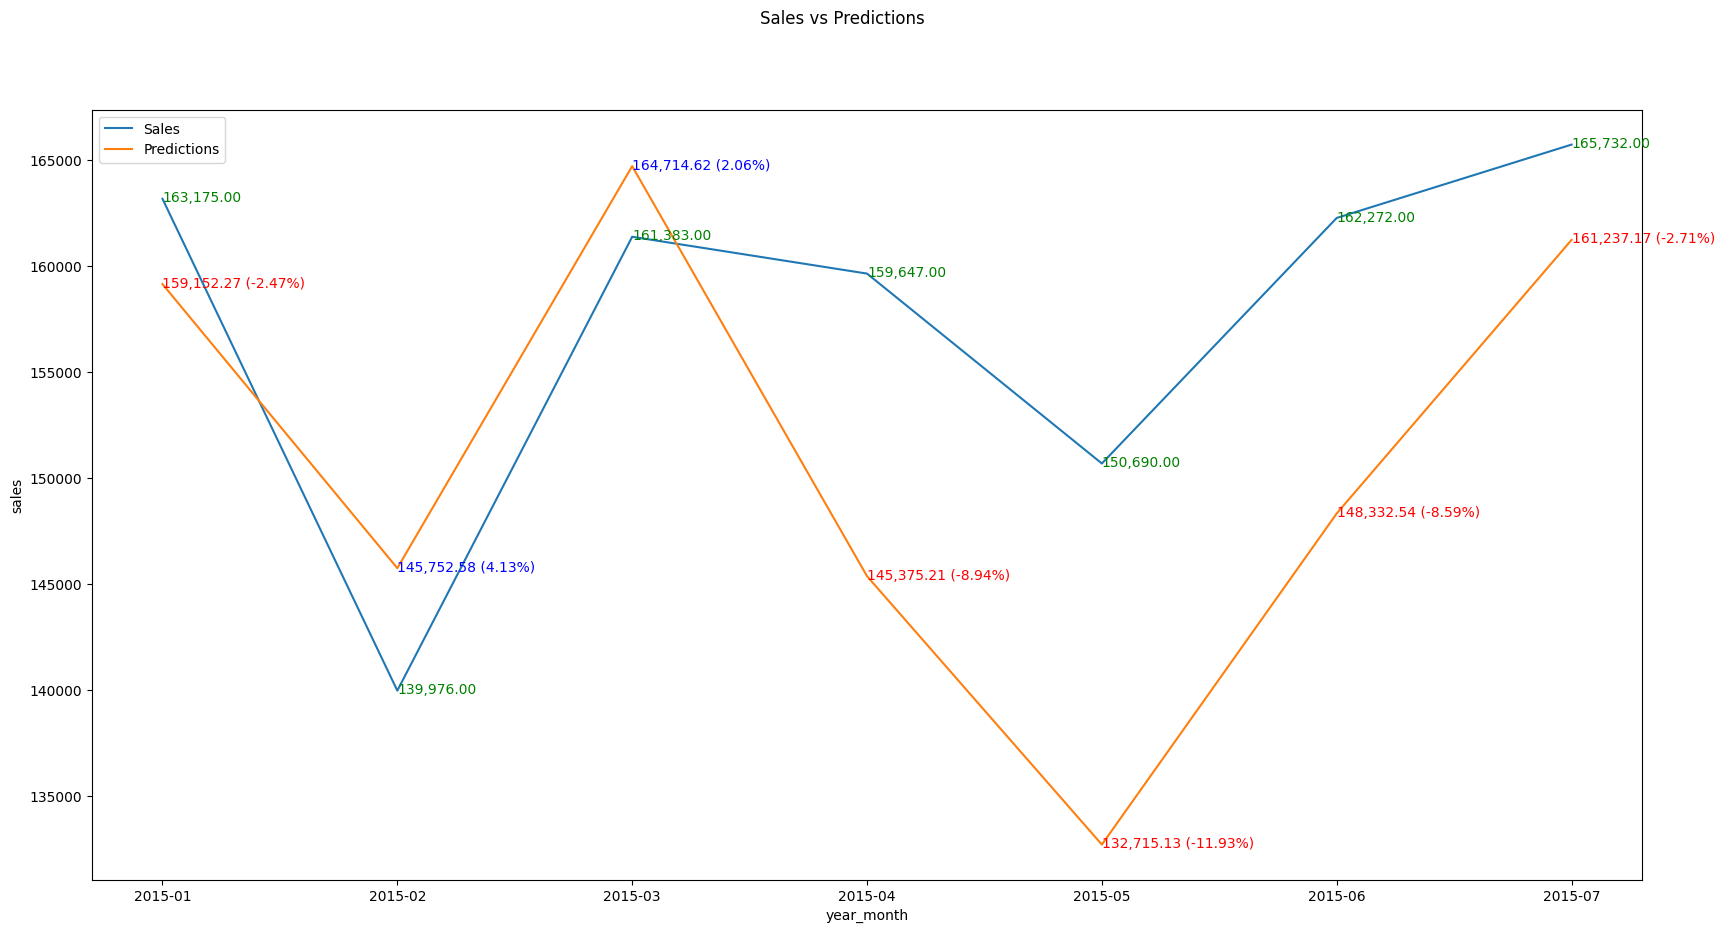

In [163]:
def cor( z ):
    if z>0:
        return "blue"
    else:
        return "red"
    
fig, axes = plt.subplots(1, 1, figsize=(20, 10) )
fig.suptitle('Sales vs Predictions')

sns.lineplot( x='year_month', y='sales', data=aux, label='Sales');


for x, y in zip( aux['year_month'], aux['sales'] ):
    plt.text(x = x,                       # x-coordinate position of data label
             y = y-150,                   # y-coordinate position of data label, adjusted to be 150 below the data point
             s = '{:,.2f}'.format(y),      # data label, formatted to ignore decimals
            color = 'green')             # set colour of line

sns.lineplot( x='year_month', y='predictions', data=aux, label='Predictions');

for x, y, z in zip( aux['year_month'], aux['predictions'], aux['percentage_error'] ):
    plt.text(x = x,                       # x-coordinate position of data label
             y = y-150,                   # y-coordinate position of data label, adjusted to be 150 below the data point
             s = '{:,.2f} ({:.2%})'.format( y, z ),      # data label, formatted to ignore decimals
            color = cor(z) )             # set colour of line
    



In [152]:
df = pd.merge( df_prior_sales, df_preds, how='left', on=['store', 'date'] )
df['year_month'] = df['date'].dt.strftime( '%Y-%m' )
df.head(-5)

,store,date,sales,predictions,year_month
0,1,2015-07-31,5263,5504.135742,2015-07
1,2,2015-07-31,6064,7625.290039,2015-07
2,3,2015-07-31,8314,8827.766602,2015-07
3,4,2015-07-31,13995,9770.062500,2015-07
4,5,2015-07-31,4822,7713.553223,2015-07
...,...,...,...,...,...
1017199,1106,2013-01-01,0,NaN,2013-01
1017200,1107,2013-01-01,0,NaN,2013-01
1017201,1108,2013-01-01,0,NaN,2013-01
1017202,1109,2013-01-01,0,NaN,2013-01


In [153]:
aux2 = df[df['store'].isin([22])][['year_month', 'sales', 'predictions']].groupby('year_month').sum().reset_index()
aux2.head(7)

,year_month,sales,predictions
0,2013-01,106067,0.0
1,2013-02,101622,0.0
2,2013-03,112824,0.0
3,2013-04,103608,0.0
4,2013-05,107045,0.0
5,2013-06,104043,0.0
6,2013-07,121456,0.0
